# **Satellite Data Pipeline for Star Detection**

# Import Modules and FITS file

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.stats import sigma_clipped_stats
import math as m
import pandas as pd

In [2]:
pip install photutils[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.9/961.9 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 31.4 MB/s eta 0:00:00


In [3]:
from photutils.detection import DAOStarFinder, find_peaks
from photutils.aperture import CircularAperture, CircularAnnulus, ApertureStats, aperture_photometry

In [4]:
from finalmethods import *

In [5]:
from algors import *

In [6]:
fits_file = fits.open('hlsp_andromeda_hst_acs-wfc_halo11_f814w_v2_img.fits')
fits_file

# Generate the data matrix and divide it into sections

In [8]:
data = fits_file[0].data
data

array([[4.0982178e+03, 4.3623262e+03, 3.8955034e+03, ..., 3.0004540e+07,
        3.0004540e+07, 3.0004540e+07],
       [4.2148521e+03, 4.5408960e+03, 4.2747314e+03, ..., 3.0004540e+07,
        3.0004540e+07, 3.0004540e+07],
       [4.5987183e+03, 4.6269004e+03, 4.4984307e+03, ..., 3.0004540e+07,
        3.0004540e+07, 3.0004540e+07],
       ...,
       [3.0004540e+07, 3.0004540e+07, 3.0004540e+07, ..., 4.6374272e+03,
        4.3102344e+03, 4.4477012e+03],
       [3.0004540e+07, 3.0004540e+07, 3.0004540e+07, ..., 4.8625308e+03,
        4.6062739e+03, 4.7189268e+03],
       [3.0004540e+07, 3.0004540e+07, 3.0004540e+07, ..., 4.6348477e+03,
        5.0484507e+03, 5.0222549e+03]], dtype='>f4')

In [9]:
data.shape

(7350, 7000)

In [10]:
sectionss = [[], [], [], [], [], [], [], [], []]
ssections = [[], [], [], [], [], [], [], [], []]
ssection = [[], [], [], [], [], [], [], [], []]
ssectionss = [[], [], [], [], [], [], [], [], []]
for i in range(len(sectionss)):
  sectionss[i] = np.zeros(shape = (735-18*(i+1), 700))
  sectionss[i] = data[23*(i+1):735, 700*(i+1):700*(i+2)]
  ssections[i]= np.zeros(shape = (409 + 33*i, 700))
  ssections[i] = data[735*9:735*9 + 409 + 33*i, 700*(i+1):700*(i+2)]
  ssection[i]= np.zeros(shape = (735, 700-(20 + 20*(8-i))))
  ssection[i] = data[735*(i+1):735*(i+2), 700*9:700*10-(20+20*(8-i))]
  ssectionss[i] = np.zeros(shape = (735, 700-(25 + 40*i)))
  ssectionss[i] = data[735*(i+1):735*(i+2), 25 + 40*i:700]

In [11]:
sections = np.zeros(shape = (10, 10, 735, 700))
for i in range(sections.shape[0]):
  for j in range(sections.shape[1]):
    sections[i, j] = data[735*(i):735*(i+1), 700*(j):700*(j+1)]

In [12]:
sections__ = [[], [], [], []]
sections__[0] = data[15:735, 0:700]
sections__[1] = data[170:735, 700*9: 700*9 + 500]
sections__[2] = data[735*9:735*9 + 400, 350:700]
sections__[3] = data[735*9:735*10-20, 700*9:700*10]

# Data Visualisation

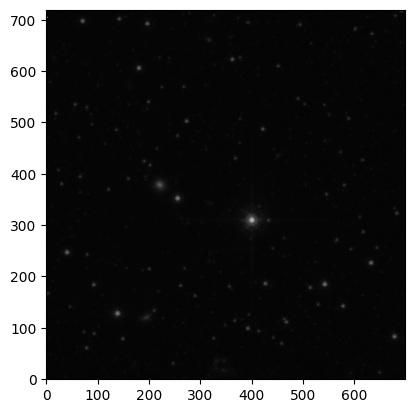

In [40]:
plt.imshow(sections__[0], cmap = 'grey', origin = 'lower', norm = LogNorm());

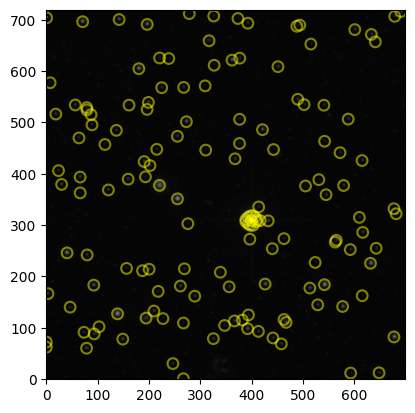

In [37]:
plt.imshow(sections__[0], cmap = 'grey', origin = 'lower', norm = LogNorm())
apertures(sections__[0]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

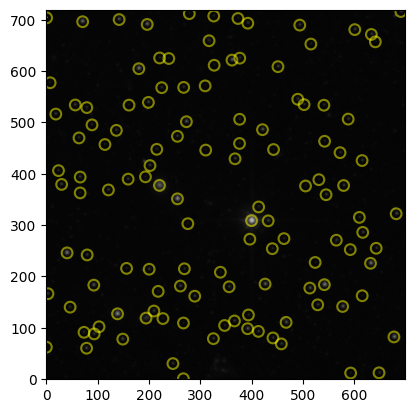

In [38]:
plt.imshow(sections__[0], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_apertures(sections__[0]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

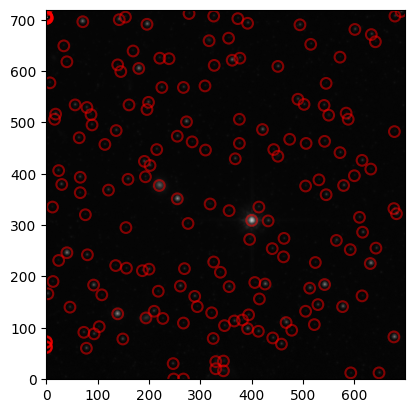

In [41]:
plt.imshow(sections__[0], cmap = 'grey', origin = 'lower', norm = LogNorm())
peak_aperture(sections__[0]).plot(color = 'red', lw = 1.5, alpha = 0.5);

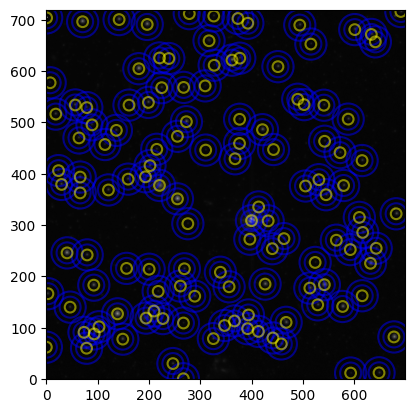

In [42]:
plt.imshow(sections__[0], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_annulus_apertures(sections__[0]).plot(color = 'blue', lw = 1.5, alpha = 0.5);
unclustered_apertures(sections__[0]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

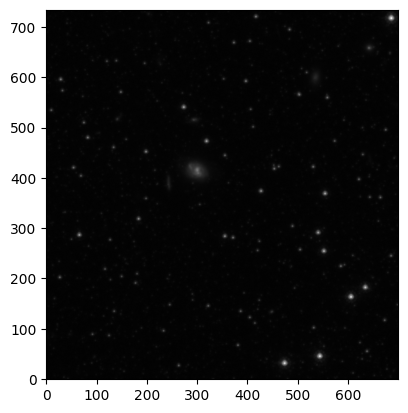

In [59]:
plt.imshow(sections[3, 7], cmap = 'grey', origin = 'lower', norm = LogNorm());

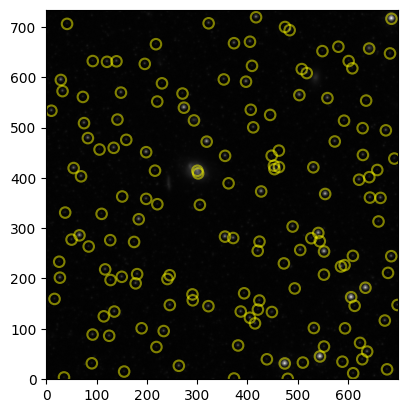

In [60]:
plt.imshow(sections[3, 7], cmap = 'grey', origin = 'lower', norm = LogNorm())
apertures(sections[3, 7]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

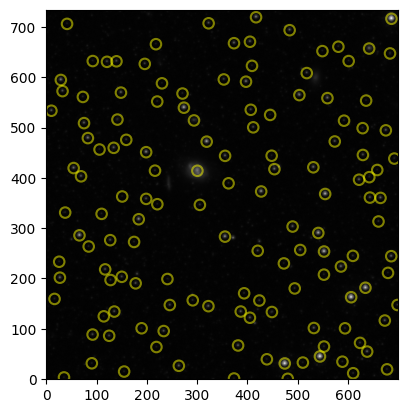

In [62]:
plt.imshow(sections[3, 7], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_apertures(sections[3, 7]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

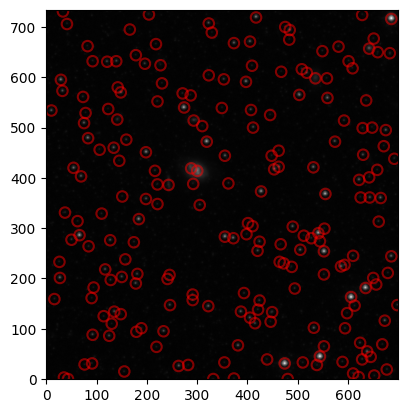

In [63]:
plt.imshow(sections[3, 7], cmap = 'grey', origin = 'lower', norm = LogNorm())
peak_aperture(sections[3, 7]).plot(color = 'red', lw = 1.5, alpha = 0.5);

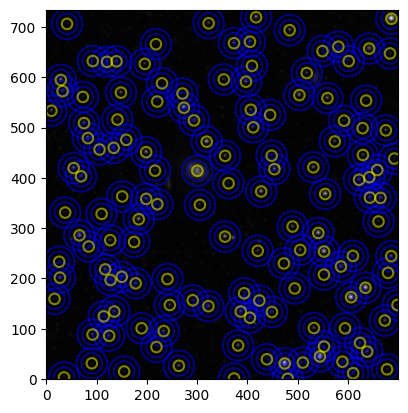

In [64]:
plt.imshow(sections[3, 7], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_annulus_apertures(sections[3, 7]).plot(color = 'blue', lw = 1.5, alpha = 0.5);
unclustered_apertures(sections[3, 7]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

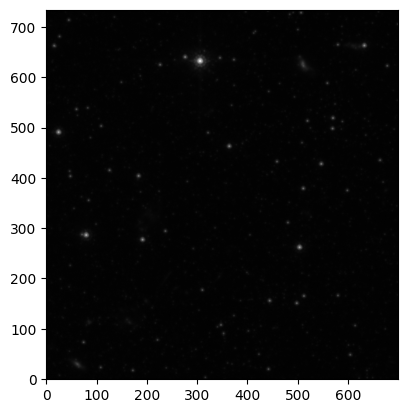

In [48]:
plt.imshow(sections[5, 6], cmap = 'grey', origin = 'lower', norm = LogNorm());

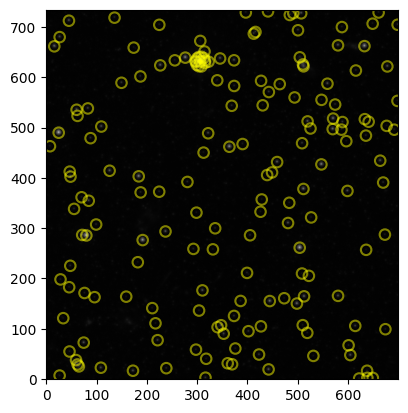

In [49]:
plt.imshow(sections[5, 6], cmap = 'grey', origin = 'lower', norm = LogNorm())
apertures(sections[5, 6]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

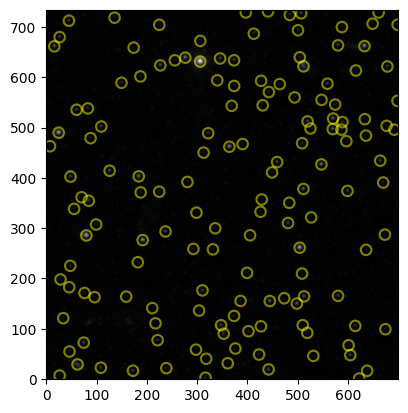

In [50]:
plt.imshow(sections[5, 6], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_apertures(sections[5, 6]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

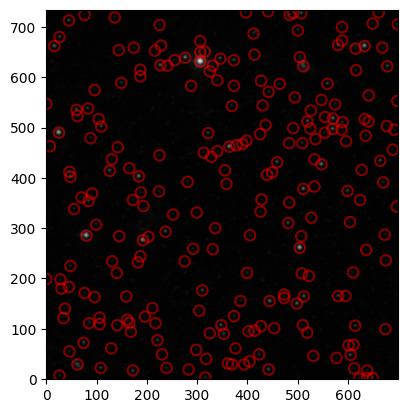

In [51]:
plt.imshow(sections[5, 6], cmap = 'grey', origin = 'lower', norm = LogNorm())
peak_aperture(sections[5, 6]).plot(color = 'red', lw = 1.5, alpha = 0.5);

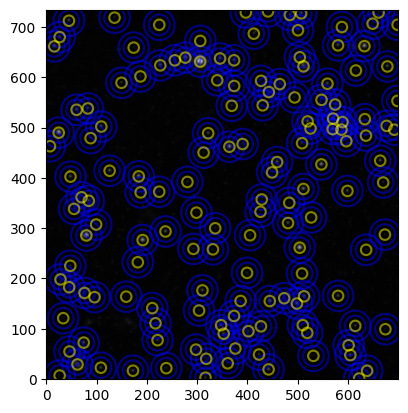

In [52]:
plt.imshow(sections[5, 6], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_annulus_apertures(sections[5, 6]).plot(color = 'blue', lw = 1.5, alpha = 0.5);
unclustered_apertures(sections[5, 6]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

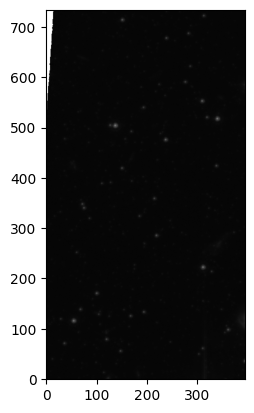

In [85]:
plt.imshow(ssectionss[7], cmap = 'grey', origin = 'lower', norm = LogNorm());

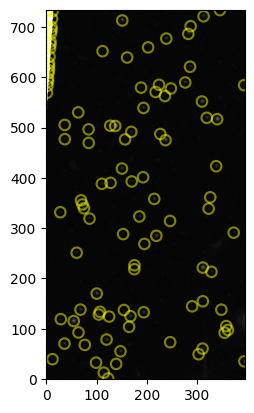

In [86]:
plt.imshow(ssectionss[7], cmap = 'grey', origin = 'lower', norm = LogNorm())
apertures(ssectionss[7]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

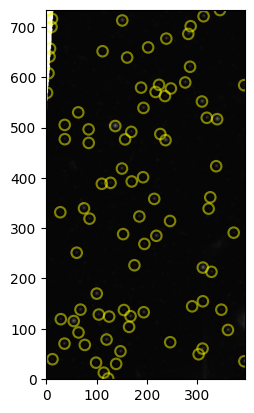

In [87]:
plt.imshow(ssectionss[7], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_apertures(ssectionss[7]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

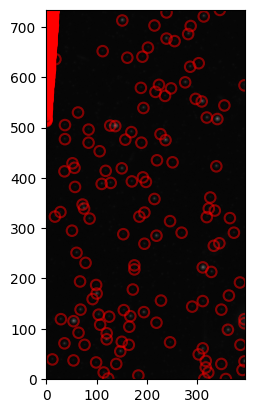

In [88]:
plt.imshow(ssectionss[7], cmap = 'grey', origin = 'lower', norm = LogNorm())
peak_aperture(ssectionss[7]).plot(color = 'red', lw = 1.5, alpha = 0.5);

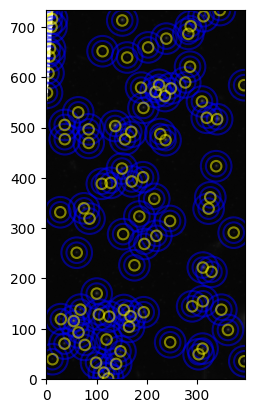

In [89]:
plt.imshow(ssectionss[7], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_annulus_apertures(ssectionss[7]).plot(color = 'blue', lw = 1.5, alpha = 0.5);
unclustered_apertures(ssectionss[7]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

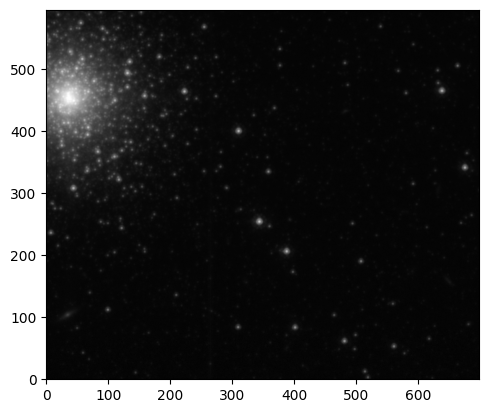

In [79]:
plt.imshow(sectionss[5], cmap = 'grey', origin = 'lower', norm = LogNorm());

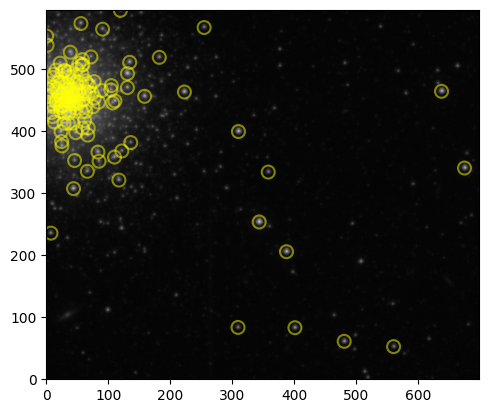

In [80]:
plt.imshow(sectionss[5], cmap = 'grey', origin = 'lower', norm = LogNorm())
apertures(sectionss[5]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

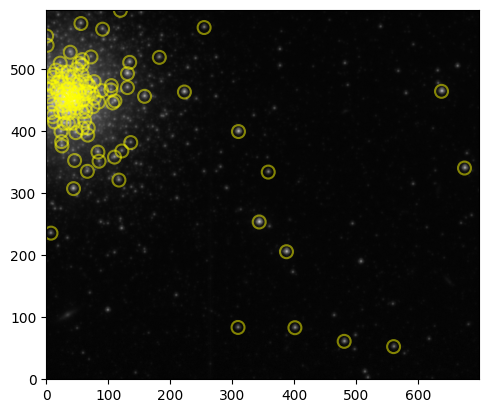

In [81]:
plt.imshow(sectionss[5], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_apertures(sectionss[5]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

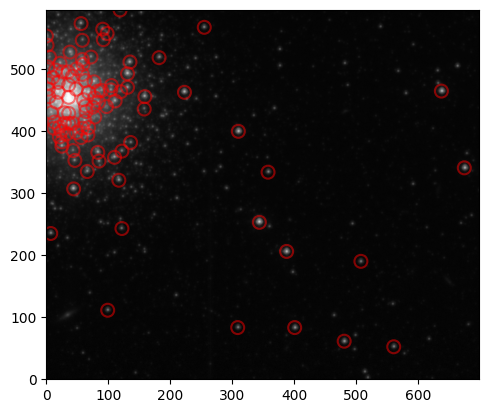

In [82]:
plt.imshow(sectionss[5], cmap = 'grey', origin = 'lower', norm = LogNorm())
peak_aperture(sectionss[5]).plot(color = 'red', lw = 1.5, alpha = 0.5);

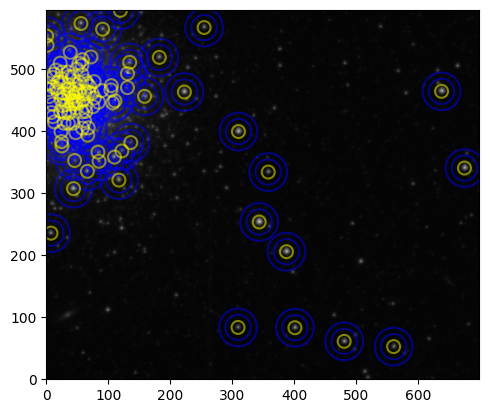

In [83]:
plt.imshow(sectionss[5], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_annulus_apertures(sectionss[5]).plot(color = 'blue', lw = 1.5, alpha = 0.5);
unclustered_apertures(sectionss[5]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

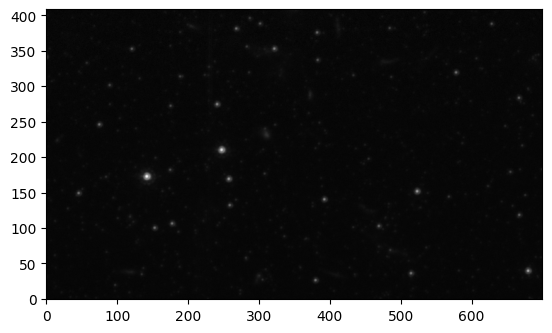

In [99]:
plt.imshow(ssections[0], cmap = 'grey', origin = 'lower', norm = LogNorm());

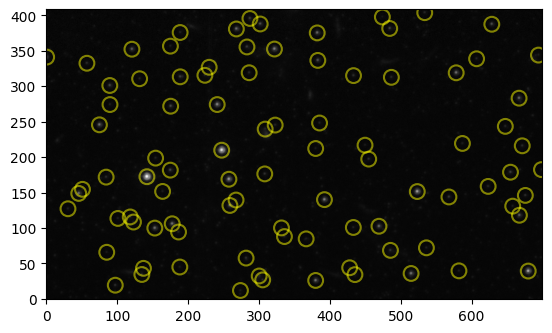

In [100]:
plt.imshow(ssections[0], cmap = 'grey', origin = 'lower', norm = LogNorm())
apertures(ssections[0]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

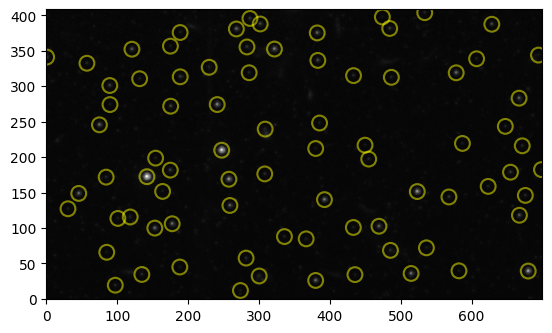

In [101]:
plt.imshow(ssections[0], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_apertures(ssections[0]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

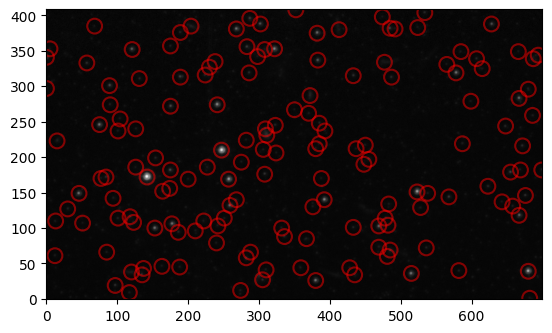

In [102]:
plt.imshow(ssections[0], cmap = 'grey', origin = 'lower', norm = LogNorm())
peak_aperture(ssections[0]).plot(color = 'red', lw = 1.5, alpha = 0.5);

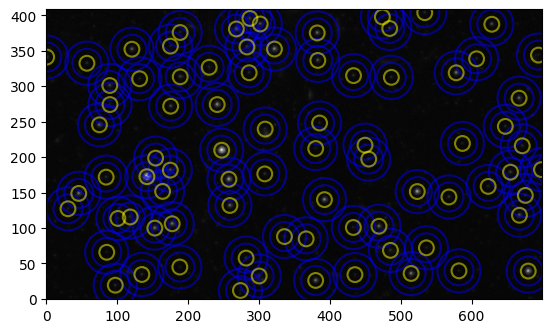

In [103]:
plt.imshow(ssections[0], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_annulus_apertures(ssections[0]).plot(color = 'blue', lw = 1.5, alpha = 0.5);
unclustered_apertures(ssections[0]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

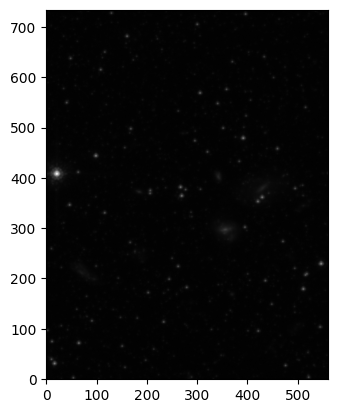

In [96]:
plt.imshow(ssection[2], cmap = 'grey', origin = 'lower', norm = LogNorm());

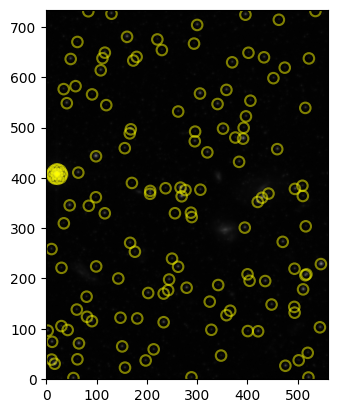

In [94]:
plt.imshow(ssection[2], cmap = 'grey', origin = 'lower', norm = LogNorm())
apertures(ssection[2]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

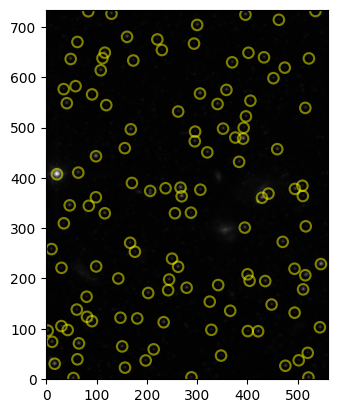

In [95]:
plt.imshow(ssection[2], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_apertures(ssection[2]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

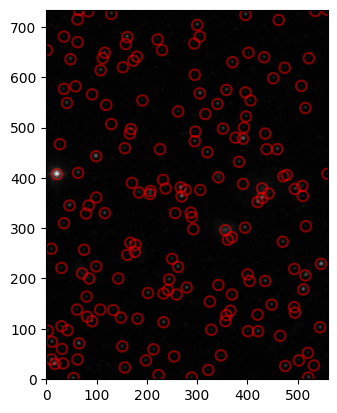

In [97]:
plt.imshow(ssection[2], cmap = 'grey', origin = 'lower', norm = LogNorm())
peak_aperture(ssection[2]).plot(color = 'red', lw = 1.5, alpha = 0.5);

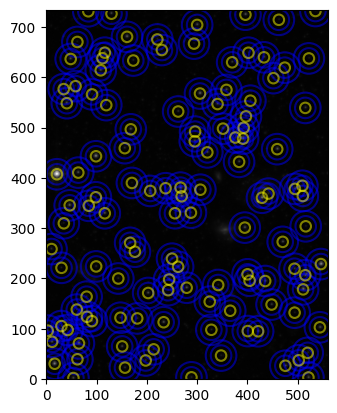

In [98]:
plt.imshow(ssection[2], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_annulus_apertures(ssection[2]).plot(color = 'blue', lw = 1.5, alpha = 0.5);
unclustered_apertures(ssection[2]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

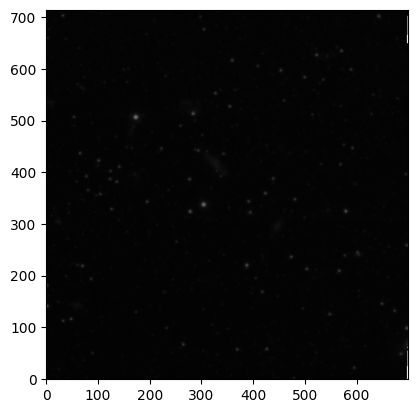

In [105]:
plt.imshow(sections__[3], cmap = 'grey', origin = 'lower', norm = LogNorm());

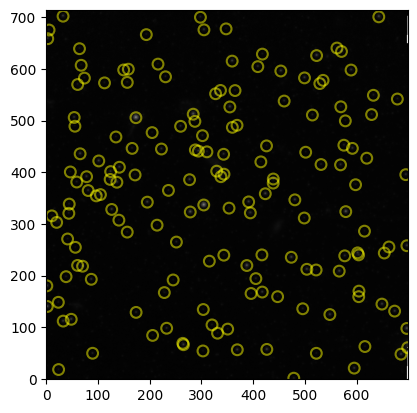

In [107]:
plt.imshow(sections__[3], cmap = 'grey', origin = 'lower', norm = LogNorm())
apertures(sections__[3]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

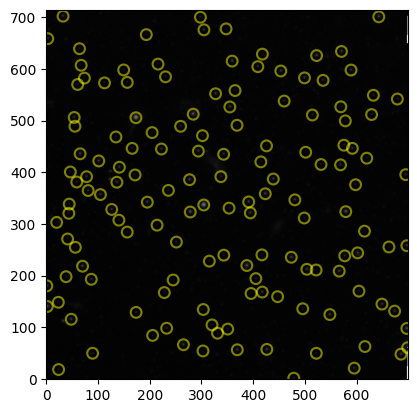

In [106]:
plt.imshow(sections__[3], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_apertures(sections__[3]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

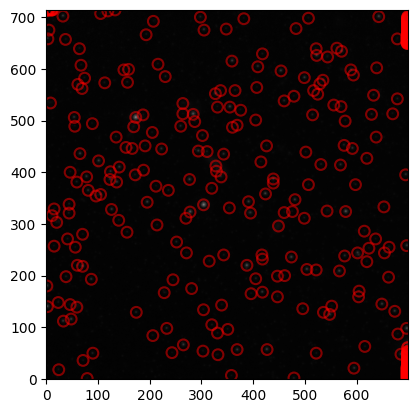

In [108]:
plt.imshow(sections__[3], cmap = 'grey', origin = 'lower', norm = LogNorm())
peak_aperture(sections__[3]).plot(color = 'red', lw = 1.5, alpha = 0.5);

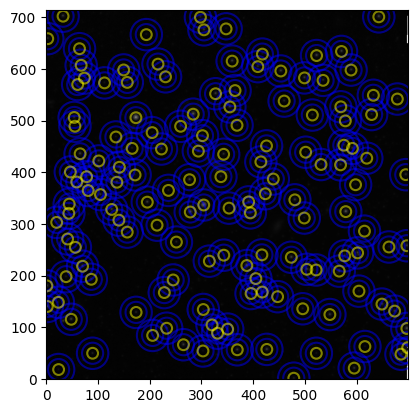

In [109]:
plt.imshow(sections__[3], cmap = 'grey', origin = 'lower', norm = LogNorm())
unclustered_annulus_apertures(sections__[3]).plot(color = 'blue', lw = 1.5, alpha = 0.5);
unclustered_apertures(sections__[3]).plot(color = 'yellow', lw = 1.5, alpha = 0.5);

# Stack function to assemble Star Properties

In [13]:
def stack(func):
  staced = []
  staced.extend(np.array(func(sections__[0])))
  for i in range(1, 9):
    staced.extend(np.array(func(sectionss[i - 1])))
  staced.extend(np.array(func(sections__[1])))
  for i in range(1, 9):
    staced.extend(np.array(func(ssectionss[i - 1])))
  for i in range(1, 9):
    for j in range(1, 9):
        staced.extend(np.array(func(sections[i, j])))
  staced.extend(np.array(func(sections__[2])))
  for i in range(1, 9):
    staced.extend(np.array(func(ssection[i - 1])))
  for i in range(1, 9):
    staced.extend(np.array(func(sectionss[i - 1])))
  staced.extend(np.array(func(sections__[3])))
  staced = np.array(staced)
  return staced

In [14]:
stars_size = stack(size_star)
stars_luminosity = stack(luminosity)
xcenter = stack(mx)
ycenter = stack(my)

In [15]:
star_ids = np.arange(1, len(stars_size)+1)

In [16]:
results_ = pd.DataFrame({'Star_ID': star_ids, 'Xcenter': xcenter, 'Ycenter': ycenter, 'Size': stars_size, 'Luminosity': stars_luminosity})
results_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13145 entries, 0 to 13144
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Star_ID     13145 non-null  int64  
 1   Xcenter     13145 non-null  float64
 2   Ycenter     13145 non-null  float64
 3   Size        13145 non-null  float64
 4   Luminosity  13145 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 513.6 KB


In [17]:
results_.to_csv('results.csv')